# Capstone Project AQI to the Death (Sprint 2)
#### Nattawaree Piyarat

Goal for Sprint 2
1. EDA
2. Prepare dataset for Modeling

**Step:**
1. Import necessary libraries.
2. Load dataset and perform EDA.

In [1]:
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

## TODO - DTALE - DATA Visulization library

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm #used for plotting

In [2]:
df = pd.read_csv('Research Dataset/who_ambient_air_quality.csv')

In [3]:
df.head()

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
0,3_Sear,IND,India,Chennai,2018,version 2022,NaN,30.0,NaN,NaN,91.0,NaN,NaN,"U.S. Department of State, United States Enviro...",https://www.airnow.gov/index.cfm?action=airnow...,9890427.0,NaN,13.087840,80.278470,1
1,3_Sear,IND,India,Solapur,2016,"version 2022, version 2018",NaN,39.0,NaN,NaN,99.0,NaN,NaN,"Central Pollution Control Board India, Environ...",NaN,985568.0,NaN,17.659919,75.906391,1
2,3_Sear,IND,India,Chennai,2019,version 2022,NaN,39.0,NaN,NaN,85.0,NaN,NaN,"U.S. Department of State, United States Enviro...","[[[""EPA AirNow DOS"",""http://airnow.gov/index.c...",9890427.0,NaN,13.087840,80.278470,1
3,3_Sear,IND,India,Hyderabad,2019,version 2022,NaN,42.0,NaN,NaN,87.0,NaN,NaN,"U.S. Department of State, United States Enviro...","[[[""EPA AirNow DOS"",""http://airnow.gov/index.c...",8943523.0,NaN,17.384050,78.456360,1
4,3_Sear,IND,India,Pune,2017,version 2022,NaN,43.0,NaN,NaN,NaN,NaN,NaN,"Central Pollution Control Board India, Environ...",http://www.cpcb.gov.in/CAAQM/,5727530.0,NaN,18.505320,73.823839,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41364 entries, 0 to 41363
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          41364 non-null  object 
 1   iso3                41364 non-null  object 
 2   country_name        41364 non-null  object 
 3   city                41252 non-null  object 
 4   year                41364 non-null  int64  
 5   version             41219 non-null  object 
 6   pm10_concentration  28177 non-null  float64
 7   pm25_concentration  21566 non-null  float64
 8   no2_concentration   26704 non-null  float64
 9   pm10_tempcov        21344 non-null  float64
 10  pm25_tempcov        16114 non-null  float64
 11  no2_tempcov         22991 non-null  float64
 12  type_of_stations    29459 non-null  object 
 13  reference           40538 non-null  object 
 14  web_link            31983 non-null  object 
 15  population          17161 non-null  float64
 16  popu

In [5]:
# check null value percentage
df.isna().mean()*100

who_region              0.000000
iso3                    0.000000
country_name            0.000000
city                    0.270767
year                    0.000000
version                 0.350546
pm10_concentration     31.880379
pm25_concentration     47.862876
no2_concentration      35.441447
pm10_tempcov           48.399575
pm25_tempcov           61.043419
no2_tempcov            44.417851
type_of_stations       28.781066
reference               1.996906
web_link               22.679141
population             58.512233
population_source     100.000000
latitude                0.601973
longitude               0.609225
who_ms                  0.000000
dtype: float64

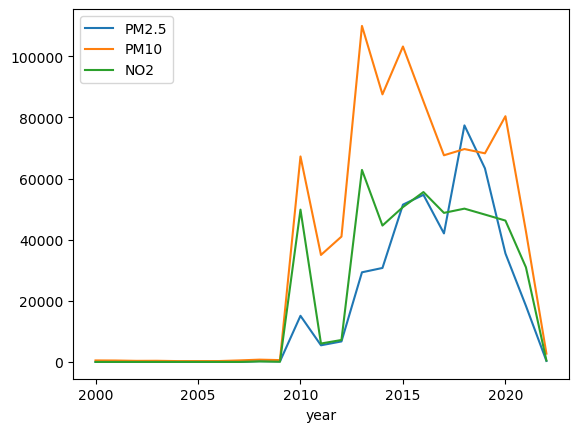

In [6]:
df.groupby(df.year)['pm25_concentration'].sum().plot(kind='line',label='PM2.5')
df.groupby(df.year)['pm10_concentration'].sum().plot(kind='line', label='PM10')
df.groupby(df.year)['no2_concentration'].sum().plot(kind='line', label='NO2')
plt.legend(loc="upper left")
plt.show()

>**Finding**
Since there are no data of PM10, PM2.5, and NO2 before year 2009. So those data should remove.\
And year 2021 -2022 impact by Pandemics so they should remove too

In [7]:
 # Delete all rows with column 'year' < 2009
df.drop(df[df.year < 2009].index, inplace=True)
df.drop(df[df.year >= 2021].index, inplace=True)
df.head()

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
0,3_Sear,IND,India,Chennai,2018,version 2022,NaN,30.0,NaN,NaN,91.0,NaN,NaN,"U.S. Department of State, United States Enviro...",https://www.airnow.gov/index.cfm?action=airnow...,9890427.0,NaN,13.087840,80.278470,1
1,3_Sear,IND,India,Solapur,2016,"version 2022, version 2018",NaN,39.0,NaN,NaN,99.0,NaN,NaN,"Central Pollution Control Board India, Environ...",NaN,985568.0,NaN,17.659919,75.906391,1
2,3_Sear,IND,India,Chennai,2019,version 2022,NaN,39.0,NaN,NaN,85.0,NaN,NaN,"U.S. Department of State, United States Enviro...","[[[""EPA AirNow DOS"",""http://airnow.gov/index.c...",9890427.0,NaN,13.087840,80.278470,1
3,3_Sear,IND,India,Hyderabad,2019,version 2022,NaN,42.0,NaN,NaN,87.0,NaN,NaN,"U.S. Department of State, United States Enviro...","[[[""EPA AirNow DOS"",""http://airnow.gov/index.c...",8943523.0,NaN,17.384050,78.456360,1
4,3_Sear,IND,India,Pune,2017,version 2022,NaN,43.0,NaN,NaN,NaN,NaN,NaN,"Central Pollution Control Board India, Environ...",http://www.cpcb.gov.in/CAAQM/,5727530.0,NaN,18.505320,73.823839,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38546 entries, 0 to 41363
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          38546 non-null  object 
 1   iso3                38546 non-null  object 
 2   country_name        38546 non-null  object 
 3   city                38440 non-null  object 
 4   year                38546 non-null  int64  
 5   version             38401 non-null  object 
 6   pm10_concentration  26092 non-null  float64
 7   pm25_concentration  20009 non-null  float64
 8   no2_concentration   24578 non-null  float64
 9   pm10_tempcov        19553 non-null  float64
 10  pm25_tempcov        14931 non-null  float64
 11  no2_tempcov         21094 non-null  float64
 12  type_of_stations    27013 non-null  object 
 13  reference           37798 non-null  object 
 14  web_link            29568 non-null  object 
 15  population          16686 non-null  float64
 16  populatio

In [9]:
# Drop unnecessory column
df = df.drop(columns=['web_link', 'reference','population_source','pm10_tempcov','pm25_tempcov','no2_tempcov','type_of_stations'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38546 entries, 0 to 41363
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          38546 non-null  object 
 1   iso3                38546 non-null  object 
 2   country_name        38546 non-null  object 
 3   city                38440 non-null  object 
 4   year                38546 non-null  int64  
 5   version             38401 non-null  object 
 6   pm10_concentration  26092 non-null  float64
 7   pm25_concentration  20009 non-null  float64
 8   no2_concentration   24578 non-null  float64
 9   population          16686 non-null  float64
 10  latitude            38299 non-null  float64
 11  longitude           38297 non-null  float64
 12  who_ms              38546 non-null  int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 4.1+ MB


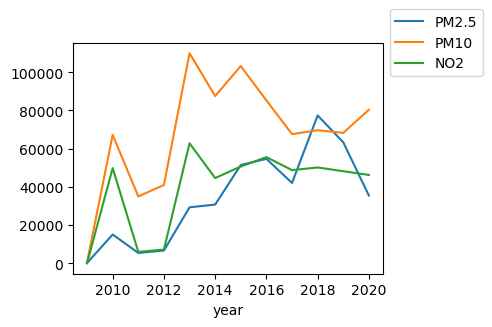

In [10]:
plt.figure(figsize=(4,3))
df.groupby(df.year)['pm25_concentration'].sum().plot(kind='line',label='PM2.5')
df.groupby(df.year)['pm10_concentration'].sum().plot(kind='line', label='PM10')
df.groupby(df.year)['no2_concentration'].sum().plot(kind='line', label='NO2')
plt.legend(loc="center left",
          bbox_to_anchor=(1, 1))
plt.show()

> **Finding**
From above graph PM10 spiked in 2013 and drop since 2017 while PM2.5 increasing.\
But in 2020 PM10 start uptrend. 

In [11]:
# Filter only concerned country
country = ["BGD", "BTN", "IDN","IND","LKA","THA","CHN"]
df = df[df['iso3'].isin(country)]

In [15]:
df.sample(10)

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,population,latitude,longitude,who_ms
20701,3_Sear,IND,India,Nongstoin,2014,version 2022,28.0,NaN,NaN,28742.0,25.870278,91.431667,1
2258,6_Wpr,CHN,China,Dongxing qu,2018,version 2022,NaN,37.0,NaN,749811.0,29.594700,105.071700,1
13879,6_Wpr,CHN,China,Changsha,2016,"version 2022, version 2018",73.0,53.0,38.0,3761018.0,28.204283,112.977737,1
13956,3_Sear,IND,India,Puri,2020,version 2023,71.0,NaN,14.0,NaN,NaN,NaN,1
2123,6_Wpr,CHN,China,Dalian,2020,version 2023,NaN,30.0,NaN,5617849.0,38.918171,121.628294,1
3606,6_Wpr,CHN,China,Maanshan,2018,version 2022,NaN,48.0,NaN,858274.0,31.694870,118.518720,1
4507,6_Wpr,CHN,China,Tongling shi,2019,version 2022,NaN,45.0,NaN,696639.0,30.941400,117.780600,1
2954,6_Wpr,CHN,China,Jiaocheng qu,2016,version 2022,NaN,27.0,NaN,429261.0,26.659475,119.524150,1
15660,3_Sear,IND,India,Alappuzha,2013,version 2022,47.0,NaN,NaN,240991.0,10.633611,76.574444,1
2065,6_Wpr,CHN,China,Chuanhui qu,2016,version 2022,NaN,69.0,NaN,721301.0,33.619437,114.651175,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6070 entries, 0 to 40445
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          6070 non-null   object 
 1   iso3                6070 non-null   object 
 2   country_name        6070 non-null   object 
 3   city                6062 non-null   object 
 4   year                6070 non-null   int64  
 5   version             6069 non-null   object 
 6   pm10_concentration  2104 non-null   float64
 7   pm25_concentration  4765 non-null   float64
 8   no2_concentration   871 non-null    float64
 9   population          5674 non-null   float64
 10  latitude            5955 non-null   float64
 11  longitude           5955 non-null   float64
 12  who_ms              6070 non-null   int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 663.9+ KB


In [16]:
# check null value percentage
df.isna().mean()*100

who_region             0.000000
iso3                   0.000000
country_name           0.000000
city                   0.131796
year                   0.000000
version                0.016474
pm10_concentration    65.337727
pm25_concentration    21.499176
no2_concentration     85.650741
population             6.523888
latitude               1.894563
longitude              1.894563
who_ms                 0.000000
dtype: float64

In [17]:
# Lat and Lon are not impact to pollutants, so remove the columns
df.dropna(subset=['latitude'], inplace=True)

In [18]:
# check null value percentage
df.isna().mean()*100

who_region             0.000000
iso3                   0.000000
country_name           0.000000
city                   0.067170
year                   0.000000
version                0.016793
pm10_concentration    66.599496
pm25_concentration    20.604534
no2_concentration     87.237615
population             4.718724
latitude               0.000000
longitude              0.000000
who_ms                 0.000000
dtype: float64

Deathrate dataset has no city, so Air dataset should group by country and set mean data to PM25,PM10,NO2

In [19]:
# Deathrate dataset has no city, so Air dataset should group by country and set mean data to PM25,PM10,NO2
df.groupby(['year','iso3'])['pm10_concentration'].mean()

year  iso3
2010  BGD     173.500000
      BTN      47.000000
      IND     176.750000
2011  BGD     139.250000
      BTN      63.250000
      CHN            NaN
      IDN            NaN
      IND     108.451429
      LKA      64.000000
2012  BGD     168.000000
      BTN     105.250000
      CHN            NaN
      IND     104.836842
2013  BGD     129.250000
      BTN      93.250000
      CHN     116.972222
      IND     100.829694
      LKA      64.000000
2014  BGD     152.222222
      BTN     109.750000
      CHN     109.189655
      IDN            NaN
      IND      95.484536
      THA      44.807692
2015  BGD     141.500000
      BTN     158.500000
      CHN      89.741667
      IDN            NaN
      IND     101.318841
      THA      40.000000
2016  BGD     128.333333
      CHN      81.513514
      IDN            NaN
      IND     111.444444
      THA      43.960000
2017  BGD     137.000000
      CHN            NaN
      IDN      23.500000
      IND     147.133333
      LKA     

In [22]:
df_a = df.groupby(['year','iso3']).agg({'pm10_concentration':'mean','pm25_concentration':'mean','no2_concentration':'mean'})
# ['pm10_concentration','pm25_concentration','no2_concentration'].apply(lambda x : x.astype(int).sum())

In [25]:
df_a = df_a.reset_index()
df_a.head(10)

,level_0,index,year,iso3,pm10_concentration,pm25_concentration,no2_concentration
0,0,0,2010,BGD,173.500000,92.500000,NaN
1,1,1,2010,BTN,47.000000,NaN,NaN
2,2,2,2010,IND,176.750000,99.000000,20.00
3,3,3,2011,BGD,139.250000,101.500000,NaN
4,4,4,2011,BTN,63.250000,NaN,NaN
5,5,5,2011,CHN,NaN,75.333333,NaN
6,6,6,2011,IDN,NaN,12.500000,NaN
7,7,7,2011,IND,108.451429,110.500000,19.75
8,8,8,2011,LKA,64.000000,NaN,NaN
9,9,9,2012,BGD,168.000000,101.000000,NaN


In [26]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   level_0             55 non-null     int64  
 1   index               55 non-null     int64  
 2   year                55 non-null     int64  
 3   iso3                55 non-null     object 
 4   pm10_concentration  43 non-null     float64
 5   pm25_concentration  43 non-null     float64
 6   no2_concentration   27 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.1+ KB


C:\Users\Nattawaree\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


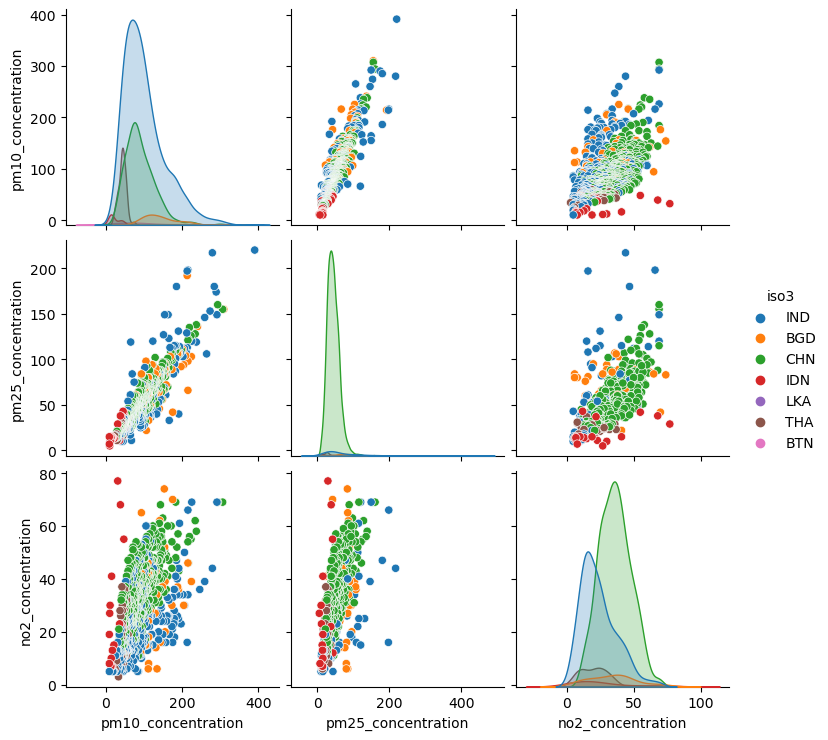

In [28]:
cols_to_plot = ['iso3','pm10_concentration','pm25_concentration','no2_concentration']
sns.pairplot(df[cols_to_plot], hue='iso3')

> **Finding**
PM10, PM25, and NO2 looks like they have linear relationship

### View and EDA data of death rate

In [29]:
df_d = pd.read_csv('Research Dataset/Cause of death/Merge 2016-2019.csv')

In [30]:
# view data
df_d.head()

,Code,Cause,Country,iso3,year,Sex,Age Group,Population,Deaths,Death rate per 100 000 population,DALY,DALY rate per 100 000 population
0,1140,Stroke,Bangladesh,BGD,2016,BTSX,ALLAges,158000000,120674.90,76.38,2676519.0,1694.00
1,1130,Ischaemic heart disease,Bangladesh,BGD,2016,BTSX,ALLAges,158000000,90632.07,57.36,2216751.0,1403.01
2,30,Tuberculosis,Bangladesh,BGD,2016,BTSX,ALLAges,158000000,61224.00,38.75,2971096.0,1880.44
3,490,Neonatal conditions,Bangladesh,BGD,2016,BTSX,ALLAges,158000000,52495.41,33.22,5453862.0,3451.81
4,1180,Chronic obstructive pulmonary disease,Bangladesh,BGD,2016,BTSX,ALLAges,158000000,39330.24,24.89,1037541.0,656.67


In [31]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3551 entries, 0 to 3550
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Code                               3551 non-null   int64  
 1   Cause                              3551 non-null   object 
 2   Country                            3421 non-null   object 
 3   iso3                               3551 non-null   object 
 4   year                               3551 non-null   int64  
 5   Sex                                3551 non-null   object 
 6   Age Group                          3551 non-null   object 
 7   Population                         3551 non-null   int64  
 8   Deaths                             3551 non-null   float64
 9   Death rate per 100 000 population  3551 non-null   float64
 10  DALY                               3551 non-null   float64
 11  DALY rate per 100 000 population   3551 non-null   float

In [32]:
#Check null value
df_d.isna().mean()*100

Code                                 0.000000
Cause                                0.000000
Country                              3.660941
iso3                                 0.000000
year                                 0.000000
Sex                                  0.000000
Age Group                            0.000000
Population                           0.000000
Deaths                               0.000000
Death rate per 100 000 population    0.000000
DALY                                 0.000000
DALY rate per 100 000 population     0.000000
dtype: float64

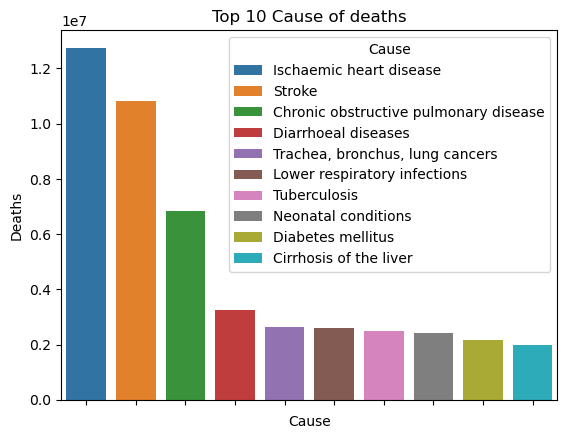

In [33]:
plt.figure()
g = df_d.groupby('Cause', as_index=False)['Deaths'].sum().sort_values(by='Deaths', ascending=False).head(10)
ax = sns.barplot(data=g, x='Cause', y='Deaths', hue='Cause', dodge=False).set(xticklabels=[],title='Top 10 Cause of deaths')

plt.show()


>**Finding** 
Top of decease is Ischaemic heart disease which cause by poor air quality in household.  [Reported by WHO](https://www.who.int/news-room/fact-sheets/detail/household-air-pollution-and-health#:~:text=The%20combined%20effects%20of%20ambient,(COPD)%20and%20lung%20cancer.) \
Chronic obstructive pulmonary might came from air quality also Ischaemic heart disease.



In [52]:
# Merge to main dataset

df_result = pd.merge(df_a, df_d, on=['iso3', 'year'], how='inner')

In [53]:
df_result.sample(10)

,level_0,index,year,iso3,pm10_concentration,pm25_concentration,no2_concentration,Code,Cause,Country,Sex,Age Group,Population,Deaths,Death rate per 100 000 population,DALY,DALY rate per 100 000 population
1262,40,40,2017,THA,39.900000,NaN,NaN,1244,Inflammatory bowel disease,Thailand,BTSX,ALLAges,69200000,99.05,0.14,2917.01,4.22
1360,41,41,2018,BGD,146.750000,71.875000,32.285714,760,"Lymphomas, multiple myeloma",Bangladesh,BTSX,ALLAges,161000000,2567.71,1.59,93516.84,58.08
1694,43,43,2018,IDN,24.750000,18.500000,27.500000,850,Schizophrenia,Indonesia,BTSX,ALLAges,268000000,0.00,0.00,538330.30,200.87
1149,39,39,2017,LKA,NaN,31.000000,NaN,250,Schistosomiasis,SriLanka,BTSX,ALLAges,21100000,0.00,0.00,0.00,0.00
943,38,38,2017,IND,147.133333,103.800000,24.600000,1190,Asthma,India,BTSX,ALLAges,1340000000,195017.30,14.55,5875364.00,438.46
1823,44,44,2018,IND,113.692308,76.000000,25.750000,560,Iodine deficiency,India,BTSX,ALLAges,1350000000,0.00,0.00,1094802.00,81.10
715,36,36,2017,CHN,NaN,44.621622,NaN,320,Rabies,NaN,BTSX,ALLAges,1430000000,15960.31,1.12,697469.70,48.77
2670,51,51,2019,THA,43.516129,24.687500,20.160000,1120,Hypertensive heart disease,Thailand,BTSX,ALLAges,69600000,2179.21,3.13,45959.32,66.03
1333,41,41,2018,BGD,146.750000,71.875000,32.285714,1230,Cirrhosis of the liver,Bangladesh,BTSX,ALLAges,161000000,20447.68,12.70,672492.90,417.70
1293,40,40,2017,THA,39.900000,NaN,NaN,315,Yellow fever,Thailand,BTSX,ALLAges,69200000,0.00,0.00,0.00,0.00


In [36]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   level_0                            2765 non-null   int64  
 1   index                              2765 non-null   int64  
 2   year                               2765 non-null   int64  
 3   iso3                               2765 non-null   object 
 4   pm10_concentration                 1979 non-null   float64
 5   pm25_concentration                 2503 non-null   float64
 6   no2_concentration                  1455 non-null   float64
 7   Code                               2765 non-null   int64  
 8   Cause                              2765 non-null   object 
 9   Country                            2635 non-null   object 
 10  Sex                                2765 non-null   object 
 11  Age Group                          2765 non-null   objec

In [37]:
#Check null value
df_result.isna().mean()*100

level_0                               0.000000
index                                 0.000000
year                                  0.000000
iso3                                  0.000000
pm10_concentration                   28.426763
pm25_concentration                    9.475588
no2_concentration                    47.377939
Code                                  0.000000
Cause                                 0.000000
Country                               4.701627
Sex                                   0.000000
Age Group                             0.000000
Population                            0.000000
Deaths                                0.000000
Death rate per 100 000 population     0.000000
DALY                                  0.000000
DALY rate per 100 000 population      0.000000
dtype: float64

In some country did not keep some type of ingredient such as Bangladesh kept only PM10 and PM2.5 but no NO2 data.
So, the dataset will keep it like that and will be show result as "Cannot analyze" for the paticular gas.

In [56]:

g = df_result.groupby(['year','Country','Cause']).agg({'Death rate per 100 000 population' : 'mean' , 'pm10_concentration':'mean','pm25_concentration':'mean','no2_concentration':'mean'})
g = g.reset_index()
g


,year,Country,Cause,Death rate per 100 000 population,pm10_concentration,pm25_concentration,no2_concentration
0,2016,Bangladesh,Acute hepatitis A,1.37,128.333333,69.0000,NaN
1,2016,Bangladesh,Acute hepatitis B,0.62,128.333333,69.0000,NaN
2,2016,Bangladesh,Acute hepatitis C,0.12,128.333333,69.0000,NaN
3,2016,Bangladesh,Acute hepatitis E,0.05,128.333333,69.0000,NaN
4,2016,Bangladesh,African trypanosomiasis,0.00,128.333333,69.0000,NaN
...,...,...,...,...,...,...,...
2630,2019,Thailand,Upper respiratory infections,0.03,43.516129,24.6875,20.16
2631,2019,Thailand,Urolithiasis,0.66,43.516129,24.6875,20.16
2632,2019,Thailand,Vitamin A deficiency,0.00,43.516129,24.6875,20.16
2633,2019,Thailand,Whooping cough,0.11,43.516129,24.6875,20.16



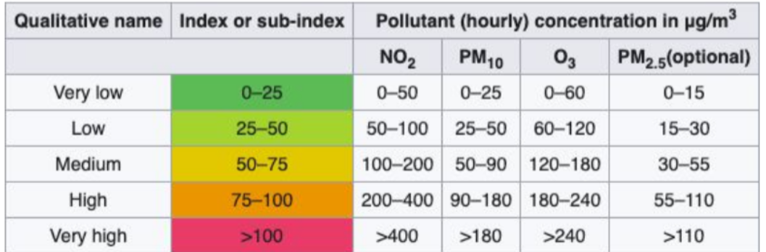

Unheathy value of PM2.5 > 55.\
Unheathy value of PM10 > 90.\
Unheathy value of NO2 > 200

Then, change to value of each pollutant (0 means healthy, 1 means unhealthy)

In [57]:
df_result['PM25_Poor'] = np.where(df_result['pm25_concentration'] > 55, 1, 0)
df_result['PM10_Poor'] = np.where(df_result['pm10_concentration'] > 90, 1, 0)
df_result['NO2_Poor'] = np.where(df_result['no2_concentration'] > 200, 1, 0)
df_result['Unhealthy'] = np.where(df_result['PM25_Poor'] | df_result['PM10_Poor'] | df_result['NO2_Poor'] ,1,0)
df_result.sample(10)

,level_0,index,year,iso3,pm10_concentration,pm25_concentration,no2_concentration,Code,Cause,Country,...,Age Group,Population,Deaths,Death rate per 100 000 population,DALY,DALY rate per 100 000 population,PM25_Poor,PM10_Poor,NO2_Poor,Unhealthy
750,36,36,2017,CHN,NaN,44.621622,NaN,250,Schistosomiasis,NaN,...,ALLAges,1430000000,415.50,0.03,82479.40,5.77,0,0,0,0
30,30,30,2016,BGD,128.333333,69.000000,NaN,1550,Falls,Bangladesh,...,ALLAges,158000000,2976.37,1.88,262263.50,165.99,1,1,0,1
140,31,31,2016,CHN,81.513514,45.636800,31.888325,1050,Uncorrected refractive errors,China,...,ALLAges,1420000000,0.00,0.00,6438211.00,453.40,0,0,0,0
1312,40,40,2017,THA,39.900000,NaN,NaN,1370,Gout,Thailand,...,ALLAges,69200000,0.00,0.00,20567.65,29.72,0,0,0,0
1585,42,42,2018,CHN,34.111111,40.447005,NaN,580,Iron-deficiency anaemia,China,...,ALLAges,1440000000,0.00,0.00,1234272.00,85.71,0,0,0,0
1600,43,43,2018,IDN,24.750000,18.500000,27.500000,1190,Asthma,Indonesia,...,ALLAges,268000000,27447.05,10.24,1044763.00,389.84,0,0,0,0
1373,41,41,2018,BGD,146.750000,71.875000,32.285714,1240,Appendicitis,Bangladesh,...,ALLAges,161000000,1235.46,0.77,76434.31,47.47,1,1,0,1
1768,44,44,2018,IND,113.692308,76.000000,25.750000,186,Acute hepatitis A,India,...,ALLAges,1350000000,14736.67,1.09,939892.60,69.62,1,1,0,1
1984,46,46,2019,BGD,NaN,86.000000,NaN,110,Diarrhoeal diseases,Bangladesh,...,ALLAges,163000000,36110.73,22.15,1521426.00,933.39,1,0,0,1
222,32,32,2016,IDN,NaN,42.666667,NaN,742,Testicular cancer,Indonesia,...,ALLAges,262000000,273.34,0.10,10480.86,4.00,0,0,0,0


In [58]:
df_result['Death_rate'] = np.round(df_result['Deaths']/df_result['Population']*100,4)
df_result.sample(10)

,level_0,index,year,iso3,pm10_concentration,pm25_concentration,no2_concentration,Code,Cause,Country,...,Population,Deaths,Death rate per 100 000 population,DALY,DALY rate per 100 000 population,PM25_Poor,PM10_Poor,NO2_Poor,Unhealthy,Death_rate
680,36,36,2017,CHN,NaN,44.621622,NaN,390,Lower respiratory infections,NaN,...,1430000000,178523.50,12.48,4398716.00,307.60,0,0,0,0,0.0125
704,36,36,2017,CHN,NaN,44.621622,NaN,1575,Exposure to mechanical forces,NaN,...,1430000000,29528.07,2.06,1812340.00,126.74,0,0,0,0,0.0021
746,36,36,2017,CHN,NaN,44.621622,NaN,150,Measles,NaN,...,1430000000,625.48,0.04,56197.71,3.93,0,0,0,0,0.0000
928,37,37,2017,IDN,23.500000,9.000000,15.5,1060,Macular degeneration,Indonesia,...,265000000,0.00,0.00,40658.97,15.34,0,0,0,0,0.0000
1897,45,45,2018,LKA,NaN,32.000000,NaN,300,Dengue,SriLanka,...,21200000,133.58,0.63,9460.35,44.62,0,0,0,0,0.0006
2253,48,48,2019,IDN,29.000000,26.666667,21.0,1530,Road injury,Indonesia,...,271000000,30667.84,11.32,1965947.00,725.44,0,0,0,0,0.0113
1214,40,40,2017,THA,39.900000,NaN,NaN,760,"Lymphomas, multiple myeloma",Thailand,...,69200000,4268.85,6.17,123656.30,178.69,0,0,0,0,0.0062
2558,50,50,2019,LKA,NaN,24.000000,NaN,860,Alcohol use disorders,SriLanka,...,21300000,82.29,0.39,26000.96,122.07,0,0,0,0,0.0004
1545,42,42,2018,CHN,34.111111,40.447005,NaN,340,Ascariasis,China,...,1440000000,35.40,0.00,7426.97,0.52,0,0,0,0,0.0000
786,36,36,2017,CHN,NaN,44.621622,NaN,1470,Oral conditions,NaN,...,1430000000,0.00,0.00,3621109.00,253.22,0,0,0,0,0.0000


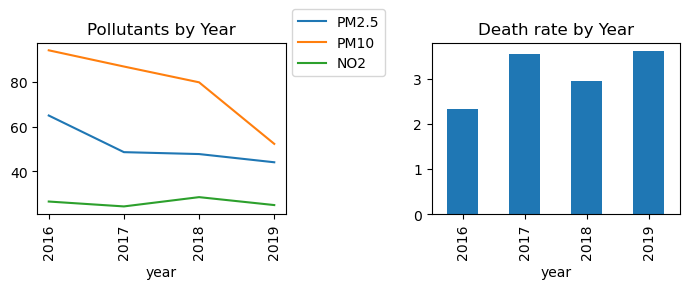

In [59]:

plt.subplots(1, 2, figsize=(7,3)) 
plt.subplot(1, 2, 1)
df_result.groupby(df_result.year)['pm25_concentration'].mean().plot(kind='line',label='PM2.5')
df_result.groupby(df_result.year)['pm10_concentration'].mean().plot(kind='line', label='PM10')
df_result.groupby(df_result.year)['no2_concentration'].mean().plot(kind='line', label='NO2',title='Pollutants by Year')
plt.xticks(rotation=90)
plt.legend(loc="center left",
          bbox_to_anchor=(1, 1))


plt.subplot(1, 2, 2)
agr_df = df_result[df_result['Cause']=='Ischaemic heart disease']
df_result.groupby(df_result.year)['Death_rate'].sum().plot(kind='bar', label='Death',title='Death rate by Year')
plt.tight_layout()
plt.show()

> **Observation**
Observation 2019 pollutants tend to reduce but the death rate increases which can assume that the pollution was not impact immediately but needs some years to be affected.

### Modeling
1. Linear Regression
2. Logistic Regression
3. Decision tree (not in this sprint)
4. Time Series (not in this sprint)


In [60]:
# Drop non-numeric columns
X = df_result.drop(['level_0','index','iso3','Code', 'Cause','Country','Sex','Age Group'],axis=1)
y = df_result['Death_rate'].copy()

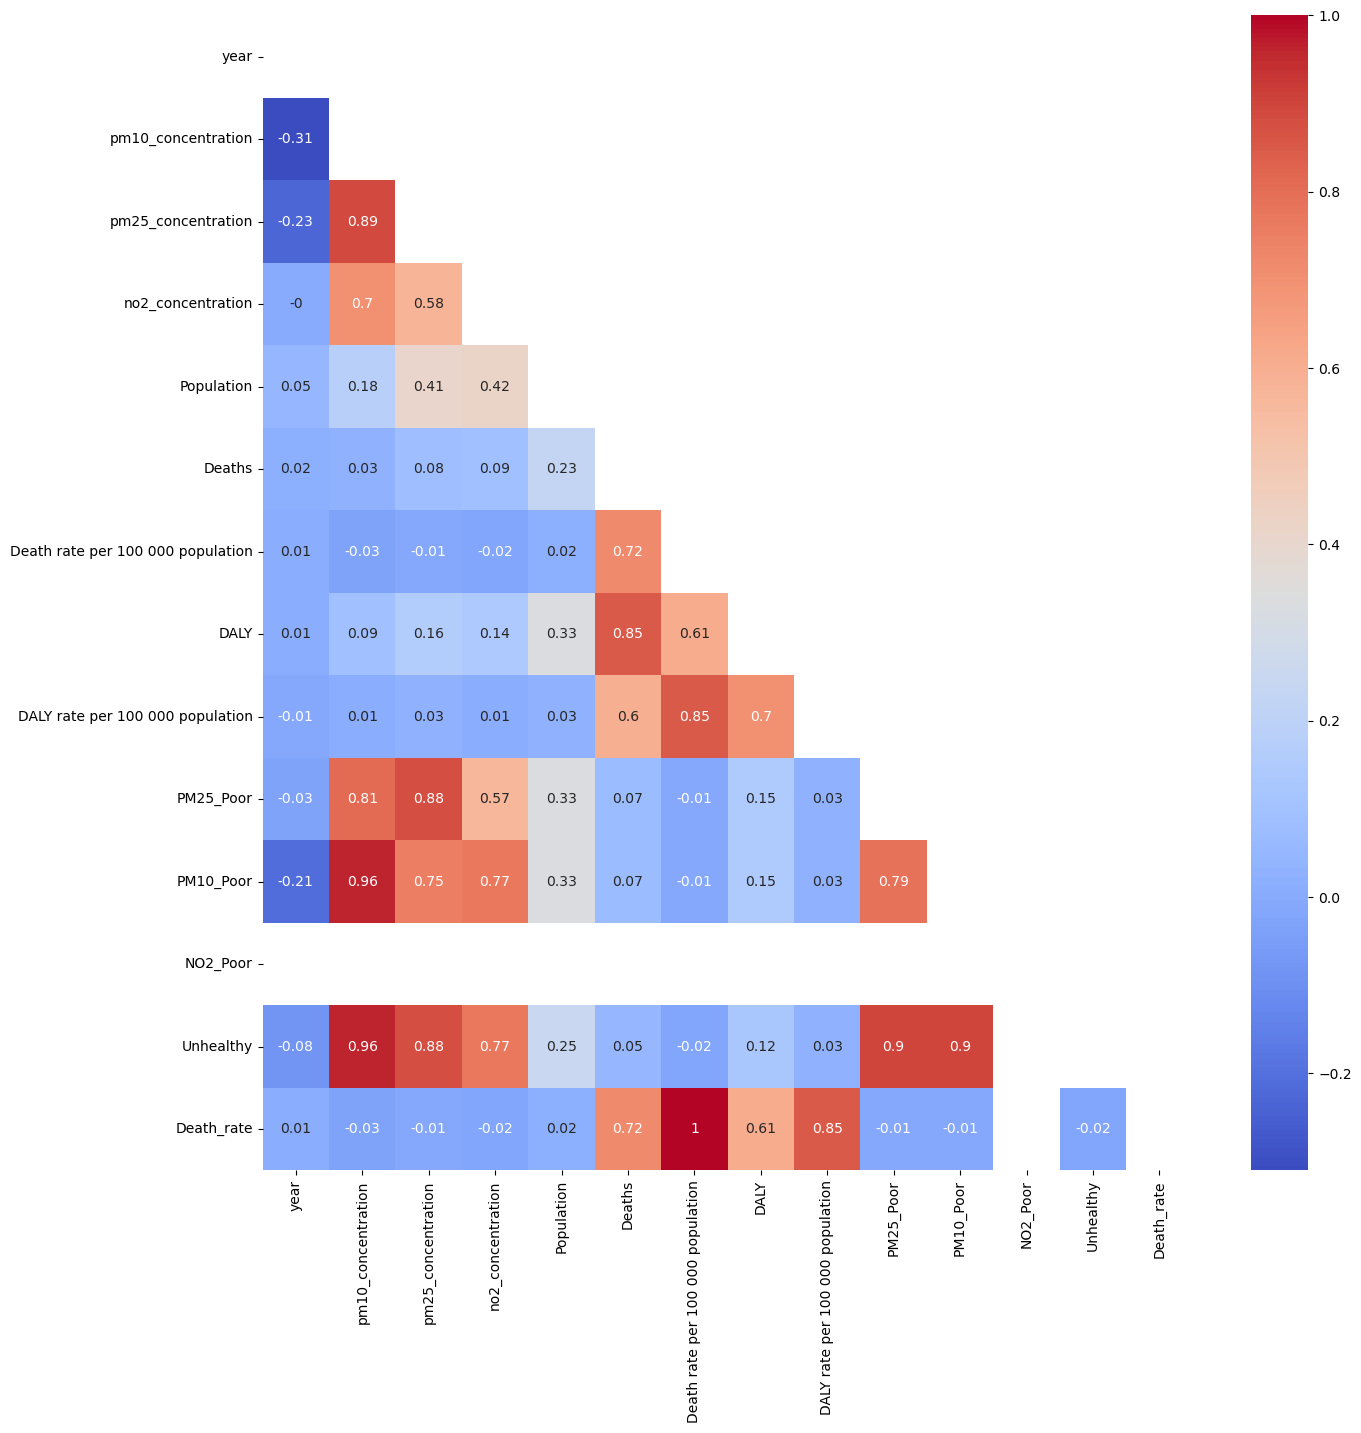

In [61]:
# Create heatmap show correlation of each columns.
correlation = X.corr()
mask = np.triu(correlation)
plt.figure(figsize=(15,15))
sns.heatmap(correlation.round(2), mask=mask, annot=True, cmap='coolwarm')
plt.show()

> **Finding**
From the heatmap and results, only numeric columns
Correlations between PM10 and PM2.5 and NO2 are strong positive.

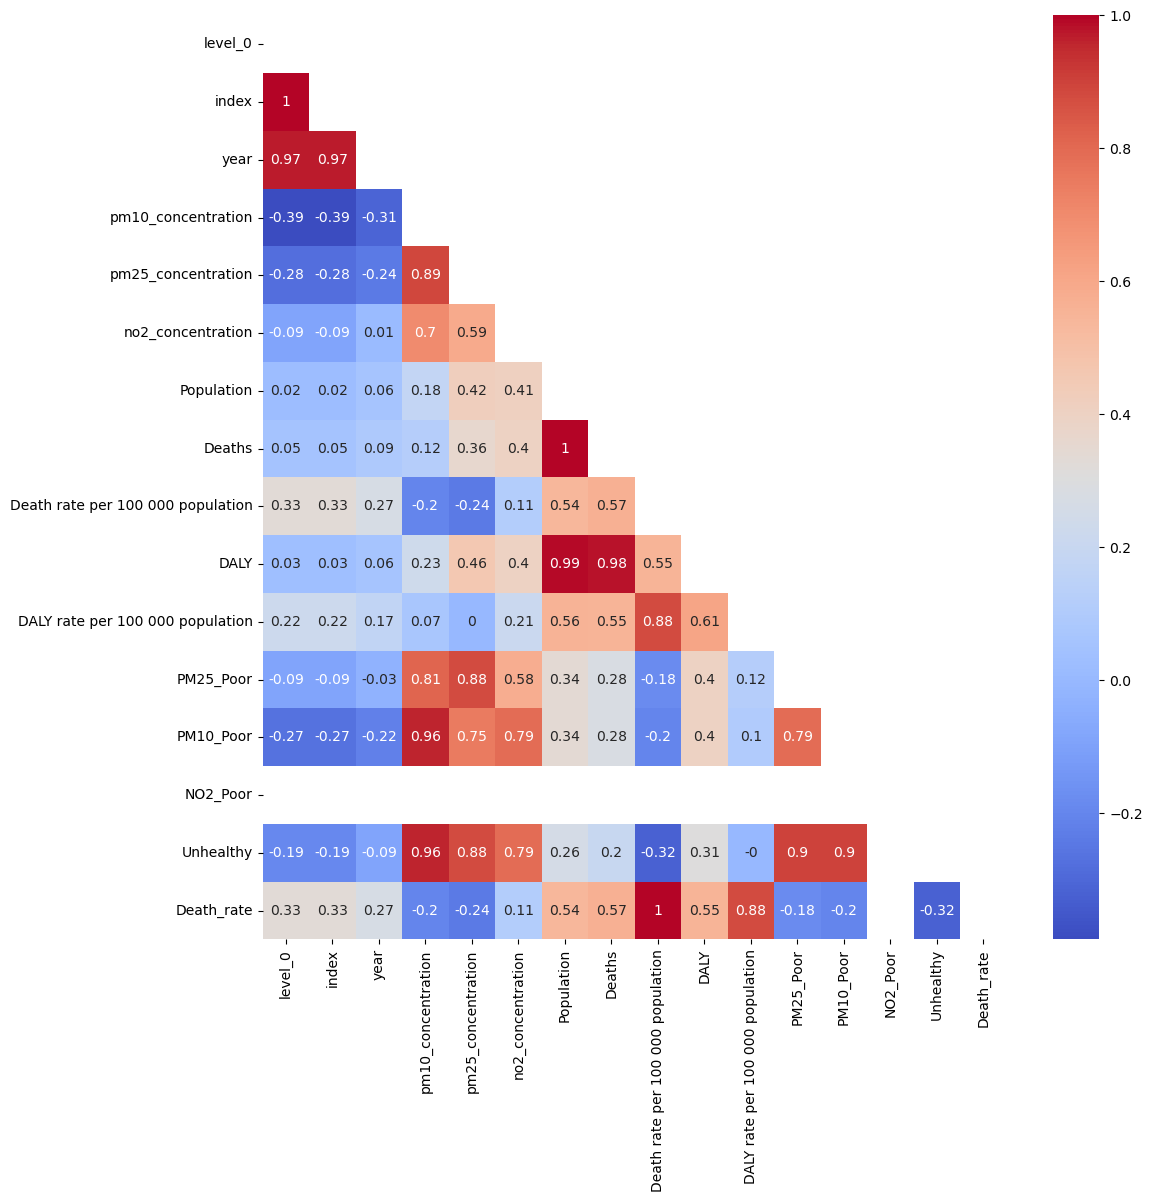

In [62]:
agr_df = df_result[df_result['Cause']=='Ischaemic heart disease']
# Drop non-numeric columns
X = agr_df.drop(['iso3','Code', 'Cause','Country','Sex','Age Group'],axis=1)
# y = agr_df['Death_rate'].copy()
# Create heatmap show correlation of each columns.
correlation = X.corr()
mask = np.triu(correlation)
plt.figure(figsize=(12,12))
sns.heatmap(correlation.round(2), mask=mask, annot=True, cmap='coolwarm')
plt.show()

Now, focus only 'Ischaemic heart disease' which is the top 1 of cause of death.\
And WHO explain that the cause came from household air pollution which the top of outdoor air pollutions.

Seems correlation between Death rate higher when compare with the pollutants (PM10, PM2.5,NO2)

C:\Users\Nattawaree\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


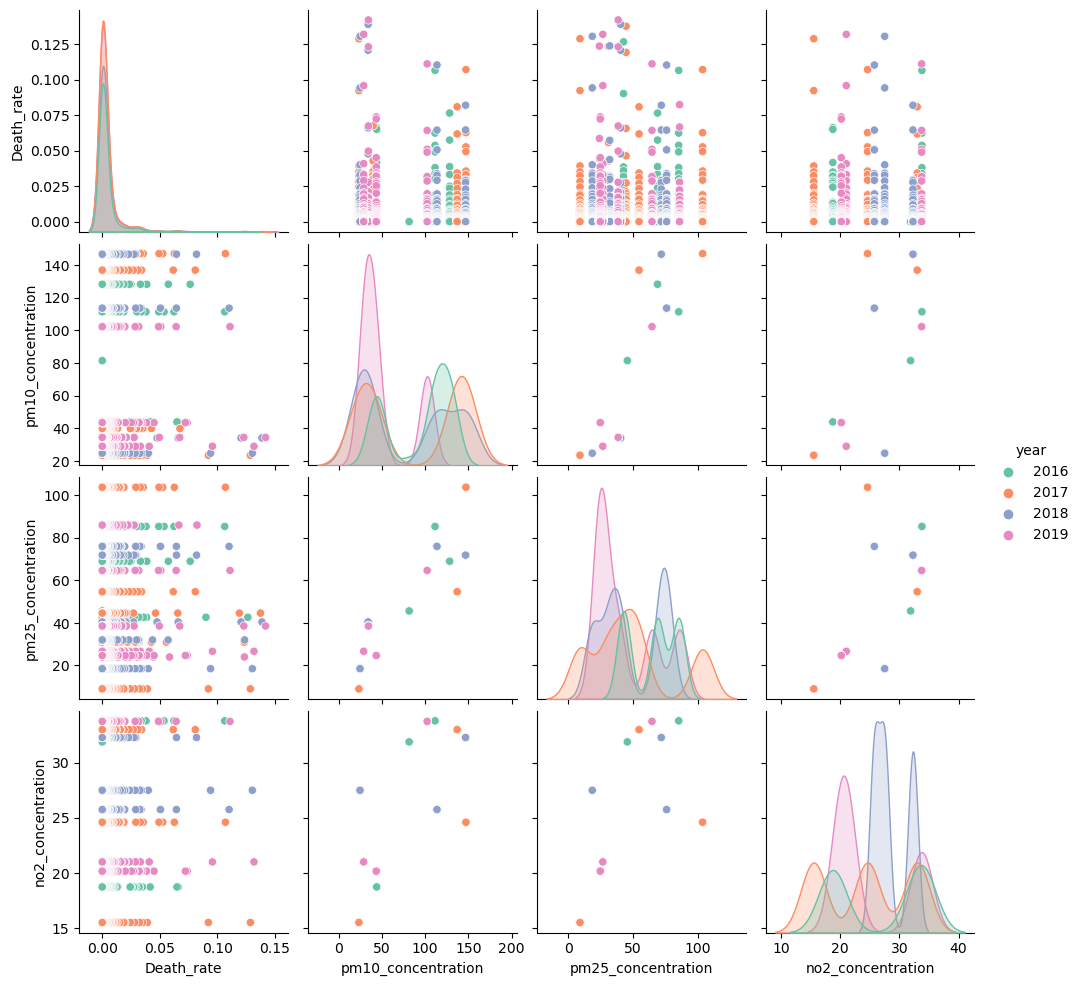

In [63]:
cols_to_plot = ['year','Death_rate','pm10_concentration','pm25_concentration','no2_concentration']
sns.pairplot(df_result[cols_to_plot], hue='year',palette='Set2')


In [64]:
df_result_m = pd.get_dummies(df_result,columns=['Country'], dtype=int)

In [65]:
df_result_m

,level_0,index,year,iso3,pm10_concentration,pm25_concentration,no2_concentration,Code,Cause,Sex,...,PM10_Poor,NO2_Poor,Unhealthy,Death_rate,Country_Bangladesh,Country_China,Country_India,Country_Indonesia,Country_SriLanka,Country_Thailand
0,30,30,2016,BGD,128.333333,69.0000,NaN,1140,Stroke,BTSX,...,1,0,1,0.0764,1,0,0,0,0,0
1,30,30,2016,BGD,128.333333,69.0000,NaN,1130,Ischaemic heart disease,BTSX,...,1,0,1,0.0574,1,0,0,0,0,0
2,30,30,2016,BGD,128.333333,69.0000,NaN,30,Tuberculosis,BTSX,...,1,0,1,0.0387,1,0,0,0,0,0
3,30,30,2016,BGD,128.333333,69.0000,NaN,490,Neonatal conditions,BTSX,...,1,0,1,0.0332,1,0,0,0,0,0
4,30,30,2016,BGD,128.333333,69.0000,NaN,1180,Chronic obstructive pulmonary disease,BTSX,...,1,0,1,0.0249,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,51,51,2019,THA,43.516129,24.6875,20.16,310,Trachoma,BTSX,...,0,0,0,0.0000,0,0,0,0,0,1
2761,51,51,2019,THA,43.516129,24.6875,20.16,205,Acute hepatitis E,BTSX,...,0,0,0,0.0000,0,0,0,0,0,1
2762,51,51,2019,THA,43.516129,24.6875,20.16,60,Chlamydia,BTSX,...,0,0,0,0.0000,0,0,0,0,0,1
2763,51,51,2019,THA,43.516129,24.6875,20.16,85,Genital herpes,BTSX,...,0,0,0,0.0000,0,0,0,0,0,1


In [66]:
df_result_m = df_result_m.drop(['level_0','index','iso3','Code', 'Cause','Sex','Age Group'],axis=1)

**Linear Regression**

In [67]:
X = df_result_m['PM10_Poor'] # Set only PM10 as independent variable
y = df_result_m['Deaths']

# add constant
X_withconstant = sm.add_constant(X)
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     13.32
Date:                Sat, 11 May 2024   Prob (F-statistic):           0.000267
Time:                        07:49:50   Log-Likelihood:                -36452.
No. Observations:                2765   AIC:                         7.291e+04
Df Residuals:                    2763   BIC:                         7.292e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.055e+04   2992.146      6.869      0.000    1.47e+04    2.64e+04
PM10_Poor   1.897e+04   5195.719      3.650      0.000    8777.805    2.92e+04
==============================================================================
Omnibus:                     4348.227   Durbin-Watson:                   0.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1797613.314
Skew:                          10.077   Prob(JB):                         0.00
Kurtosis:                     126.276   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
X = df_result_m['PM25_Poor'] 
y = df_result_m['Deaths']

# add constant
X_withconstant = sm.add_constant(X)
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     13.36
Date:                Sat, 11 May 2024   Prob (F-statistic):           0.000262
Time:                        07:49:56   Log-Likelihood:                -36452.
No. Observations:                2765   AIC:                         7.291e+04
Df Residuals:                    2763   BIC:                         7.292e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.055e+04   2992.128      6.867      0.000    1.47e+04    2.64e+04
PM25_Poor   1.899e+04   5195.688      3.655      0.000    8800.760    2.92e+04
==============================================================================
Omnibus:                     4348.259   Durbin-Watson:                   0.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1797707.285
Skew:                          10.078   Prob(JB):                         0.00
Kurtosis:                     126.279   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
X = df_result_m['NO2_Poor'] 
y = df_result_m['Deaths']

# add constant
X_withconstant = sm.add_constant(X)
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

C:\Users\Nattawaree\Documents\Anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 11 May 2024   Prob (F-statistic):                nan
Time:                        07:50:04   Log-Likelihood:                -36458.
No. Observations:                2765   AIC:                         7.292e+04
Df Residuals:                    2764   BIC:                         7.292e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.684e+04   2451.615     10.949      0.000     2.2e+04    3.17e+04
NO2_Poor            0          0        nan        nan           0           0
==============================================================================
Omnibus:                     4336.758   Durbin-Watson:                   0.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1755729.646
Skew:                          10.032   Prob(JB):                         0.00
Kurtosis:                     124.807   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [70]:
X = df_result_m[['PM10_Poor','PM25_Poor']] 
y = df_result_m['Deaths']

# add constant
X_withconstant = sm.add_constant(X)
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     7.470
Date:                Sat, 11 May 2024   Prob (F-statistic):           0.000581
Time:                        07:50:07   Log-Likelihood:                -36451.
No. Observations:                2765   AIC:                         7.291e+04
Df Residuals:                    2762   BIC:                         7.293e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.98e+04   3050.601      6.489      0.000    1.38e+04    2.58e+04
PM10_Poor   1.057e+04   8407.718      1.257      0.209   -5915.628    2.71e+04
PM25_Poor   1.068e+04   8407.718      1.270      0.204   -5808.514    2.72e+04
==============================================================================
Omnibus:                     4349.708   Durbin-Watson:                   0.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1802873.431
Skew:                          10.083   Prob(JB):                         0.00
Kurtosis:                     126.459   Cond. No.                         5.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# Let see only the top decease
df_result_ihd = df_result[df_result['Cause']=='Ischaemic heart disease']
pd.get_dummies(df_result_ihd,columns=['Country'], dtype=int)

df_result_ihd = df_result_ihd.drop(['iso3','Code', 'Cause','Sex','Age Group'],axis=1)

In [83]:
X = df_result_ihd[['PM25_Poor']] 
y = df_result_ihd['Deaths']

# add constant
X_withconstant = sm.add_constant(X)
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.594
Date:                Sat, 11 May 2024   Prob (F-statistic):              0.222
Time:                        07:57:43   Log-Likelihood:                -311.55
No. Observations:                  21   AIC:                             627.1
Df Residuals:                      19   BIC:                             629.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.66e+05   1.89e+05      2.470      0.023    7.12e+04    8.61e+05
PM25_Poor   4.125e+05   3.27e+05      1.263      0.222   -2.71e+05     1.1e+06
==============================================================================
Omnibus:                        3.203   Durbin-Watson:                   2.638
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.642
Skew:                           0.788   Prob(JB):                        0.267
Kurtosis:                       2.267   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
X = df_result_ihd[['PM10_Poor']] 
y = df_result_ihd['Deaths']

# add constant
X_withconstant = sm.add_constant(X)
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.577
Date:                Sat, 11 May 2024   Prob (F-statistic):              0.224
Time:                        07:57:30   Log-Likelihood:                -311.56
No. Observations:                  21   AIC:                             627.1
Df Residuals:                      19   BIC:                             629.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.667e+05   1.89e+05      2.473      0.023    7.17e+04    8.62e+05
PM10_Poor   4.104e+05   3.27e+05      1.256      0.224   -2.74e+05    1.09e+06
==============================================================================
Omnibus:                        3.192   Durbin-Watson:                   2.634
Prob(Omnibus):                  0.203   Jarque-Bera (JB):                2.630
Skew:                           0.785   Prob(JB):                        0.268
Kurtosis:                       2.262   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
X = df_result_ihd[['PM10_Poor','PM25_Poor']] 
y = df_result_ihd['Deaths']

# add constant
X_withconstant = sm.add_constant(X)
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.8497
Date:                Sat, 11 May 2024   Prob (F-statistic):              0.444
Time:                        08:00:57   Log-Likelihood:                -311.45
No. Observations:                  21   AIC:                             628.9
Df Residuals:                      18   BIC:                             632.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.499e+05   1.97e+05      2.287      0.034    3.67e+04    8.63e+05
PM10_Poor   2.255e+05    5.4e+05      0.418      0.681   -9.09e+05    1.36e+06
PM25_Poor   2.353e+05    5.4e+05      0.436      0.668   -8.99e+05    1.37e+06
==============================================================================
Omnibus:                        3.277   Durbin-Watson:                   2.623
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                2.735
Skew:                           0.827   Prob(JB):                        0.255
Kurtosis:                       2.373   Cond. No.                         5.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The previos version was not contain China**\
Consider only PM10 R^2 is 0.031\
Consider only PM2.5 R^2 is 0.032\
Consider only NO2 R^2 is 0 (Seems the NO2 does not has correlation with the death rate by linear regression)\
Consider PM10 and PM2.5 R^2 is increase to 0.36

**Result after add more datapoints (China)** \
Consider only PM10 R^2 is 0.077\
Consider only PM2.5 R^2 is 0.077\
Consider PM10 and PM2.5 R^2 is increase to 0.86


>**Finding**
After filter only 'Ischaemic heart disease' the R^2 increase to 0.86 \
So, it can assume that the PM10 and PM2.5 are strong correlation with death from 'Ischaemic heart disease'

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [89]:
# 1. Instantiate the model
linear_regression_model = LinearRegression() 

# 2. Fit the model
linear_regression_model.fit(X, y)

#The intercept
intercept = linear_regression_model.intercept_

#The coefficient, notice it returns an array with one spot for each feature
coefficient = linear_regression_model.coef_[0]

print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficient}')

Intercept: 449875.7655428571
Coefficients: 225514.90240000008


In [90]:
# Step 3 prediction
model_prediction = linear_regression_model.predict(X)

In [91]:
# Evaluate the model
print(f'The R2 score: {r2_score(y, model_prediction)}')

The R2 score: 0.08626510301602042


>**Finding**  from sklearn R^2 is same result

In [92]:
df_result_ihd.isna().mean()*100

level_0                              0.0
index                                0.0
year                                 0.0
pm10_concentration                   0.0
pm25_concentration                   0.0
no2_concentration                    0.0
Country                              0.0
Population                           0.0
Deaths                               0.0
Death rate per 100 000 population    0.0
DALY                                 0.0
DALY rate per 100 000 population     0.0
PM25_Poor                            0.0
PM10_Poor                            0.0
NO2_Poor                             0.0
Unhealthy                            0.0
Death_rate                           0.0
dtype: float64

**Logistic Regression**

1. Change X to concentration of PM10, PM2.5 and NO2
2. y is Unhealthy indecator which derived from pollutants poor indicator

In [93]:
X = df_result_ihd[['pm10_concentration','pm25_concentration','no2_concentration']] 
y = df_result_ihd['Unhealthy'].copy()

In [94]:
# 1. Instantiate the model
logit_regression_model = LogisticRegression() 

# 2. Fit the model
logit_regression_model.fit(X, y)

#The intercept
intercept = logit_regression_model.intercept_

#The coefficient, notice it returns an array with one spot for each feature
coefficient = logit_regression_model.coef_[0]

print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficient}')

Intercept: [-19.57374631]
Coefficients: [0.06413715 0.28817397 0.05331231]


In [95]:
# Step 3 prediction
model_prediction = logit_regression_model.predict(X)
# Evaluate the model
print(f'The R2 score: {r2_score(y, model_prediction)}')

The R2 score: 1.0


>**Finding**
High pollutants concentation have strong correlation with Unhealthy indicator because the unhealthy indicator came form those 3 features (pollutants)\
By the way, this dataset df_result_ihd will be a baseline version but if found some better dataset I might change the baseline.

### Next step
1. As the pollution takes time for affect decease and death but they are significant to death rate. So, next will be focus pollutants predict each others.
2. Find more dataset which has more pollutants and AQI data. 
3. Add more datapoints because after add more datapoints (China) the R^2 is a significant increase.
3. Build more model to analyze.
4. Project summarize.